In [1]:
# All the imports
import pandas as pd
from pandas.errors import SettingWithCopyWarning
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

In [2]:
def unique_values(csv_file):
    df = pd.read_csv(csv_file)
    unique_values = df['_field'].unique()
    for value in unique_values:
        print(value)

unique_values('2ue_1jammer_uhd_srsgnb.csv')

cfo
distance_km
nan
TRUE
string
_field
dl_earfcn
dl_evm
dl_mcs
fec_iters
pathloss
pci
ri
rrc_state
rsrp
rsrq
rssi
rx_brate
rx_errors
rx_pkts
sfo
sinr
speed_kmph
sync_err
ta_us
tx_brate
tx_errors
tx_pkts
ul_buffer
ul_mcs
ul_power
dl_tput_mbps
emm_state
nof_active_cc
nof_active_eps_bearer
proc_rmem
proc_rmem_kB
proc_vmem_kB
rf_l
rf_o
rf_u
sys_mem
system_load
ul_dropped_sdus
ul_tput_mbps


In [3]:
# Filtering out specific field

def csv_parser(csv_file, csv_output):
    df = pd.read_csv(csv_file)

    filtered_df = df[df['_field'] == values_to_filter]

    # Select required columns
    filtered_df = filtered_df[['_time', '_value', '_field', 'srsue_data_id']]

    # Saving the output
    filtered_df.to_csv(csv_output, index=False)
    print(f"Filtered data saved as {csv_output}.")

# CHANGE HERE
values_to_filter = 'sinr'
csv_file = '2ue_1jammer_uhd_srsgnb.csv'
csv_output = f'{values_to_filter}_data.csv'
csv_parser(csv_file, csv_output)

Filtered data saved as sinr_data.csv.


                            _time  _value _field srsue_data_id
0  2025-01-29T20:28:03.205411367Z   21.28   sinr       ue1_uhd
1  2025-01-29T20:28:03.685727367Z   21.25   sinr       ue1_uhd
2  2025-01-29T20:28:04.165713367Z   21.30   sinr       ue1_uhd
3  2025-01-29T20:28:04.646020367Z   21.36   sinr       ue1_uhd
4  2025-01-29T20:28:05.126639367Z   21.43   sinr       ue1_uhd
Number of rows for ue1_uhd: 3557, and for ue2_uhd: 3576


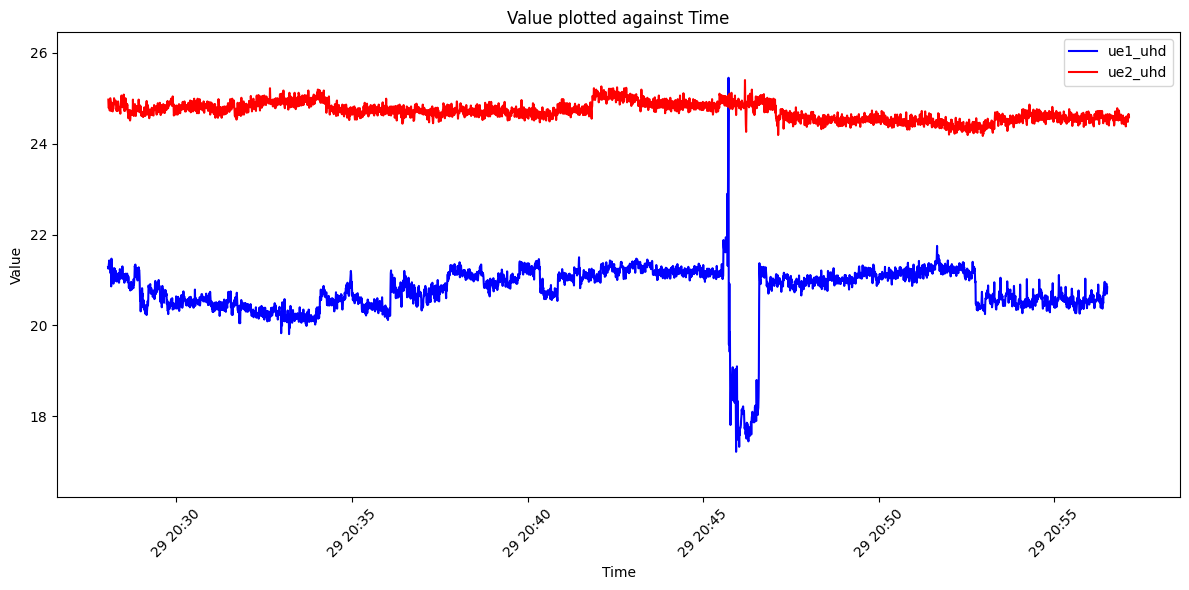

In [4]:
# Plotting the output

def plot_values(csv_output):
    df = pd.read_csv(csv_output)
    print(df.head())

    ue1_data = df[df['srsue_data_id'] == 'ue1_uhd']
    ue2_data = df[df['srsue_data_id'] == 'ue2_uhd']

    print(f"Number of rows for ue1_uhd: {len(ue1_data)}, and for ue2_uhd: {len(ue2_data)}")

    if ue1_data.empty and ue2_data.empty:
        print("No data to plot for ue1_uhd or ue2_uhd.")
        return

    ue1_data['_time'] = pd.to_datetime(ue1_data['_time'])
    ue2_data['_time'] = pd.to_datetime(ue2_data['_time'])

    plt.figure(figsize=(12, 6))

    if not ue1_data.empty:
        plt.plot(ue1_data['_time'],
                 ue1_data['_value'],
                 'b-',
                 label='ue1_uhd',
                 color='blue',
                 markersize=5)

    if not ue2_data.empty:
        plt.plot(ue2_data['_time'],
                 ue2_data['_value'],
                 'r-',
                 label='ue2_uhd',
                 color='red',
                 markersize=5)

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Value plotted against Time')
    plt.legend()
    plt.xticks(rotation=45)

    if not df.empty:
        y_min = min(df['_value'].min(), ue1_data['_value'].min(), ue2_data['_value'].min())
        y_max = max(df['_value'].max(), ue1_data['_value'].max(), ue2_data['_value'].max())
        plt.ylim(y_min - 1, y_max + 1)

    plt.tight_layout()
    plt.show()

# CHANGE HERE
csv_output = 'sinr_data.csv'
plot_values(csv_output)

In [5]:
import pandas as pd
import numpy as np

def parse_csv(csv_input):
    df = pd.read_csv(csv_input)
    df['_time'] = pd.to_datetime(df['_time'], errors='coerce')
    df['_time'] = df['_time'].dt.strftime('%Y-%m-%d %H:%M:%S.%f').str[:-3]

    pivoted_df = df.pivot_table(index='_time', columns='_field', values='_value', aggfunc='first')
    pivoted_df.reset_index(inplace=True)
    pivoted_df = pivoted_df.fillna('')
    return pivoted_df

def format_output(df):
    print('\t'.join(df.columns))
    for _, row in df.iterrows():
        print('\t'.join(map(str, row.values)))

# Usage
csv_input = '2ue_1jammer_uhd_srsgnb.csv'
parsed_data = parse_csv(csv_input)
format_output(parsed_data)


Streaming output truncated to the last 5000 lines.
2025-01-29 20:36:38.026	3.18	0	368500	0.08	24.78	0	0	1.52	1	0	0	1	0	714456	1647668	0	0	0	0	0	2.71	0	0	0.03	0	26	3	20.63	0	0.01	8	1	0	4.25	4	251	379610	0	4.82	-10.29	10.2
2025-01-29 20:36:38.038	-0.96	0	368500	0.05	26.84	0	0	1.04	1	0	0	1	0	714880	1648044	0	0	0	0	0	0.8	0	0	0.03	0	24	0	24.74	0	-0.02	8	1	0	3.12	1	250	379569	0	3.34	-10.22	10.18
2025-01-29 20:36:38.506	-0.51	0	368500	0.08	25.52	0	0	2.04	1	0	0	1	0	714456	1647668	0	0	0	0	0	2.63	0	0	0.03	0	26	0	20.62	0	0.01	8	1	0	4.04	5	251	378764	0	4.56	-10.17	10.18
2025-01-29 20:36:38.528	1.2	0	368500	0.05	26.83	0	0	1.12	1	0	0	1	0	714880	1648044	0	0	0	0	0	0.93	0	0	0.03	0	23	1	24.63	0	-0.02	8	2	0	3.17	3	250	379823	0	3.41	-10.16	10.2
2025-01-29 20:36:38.986	0.81	0	368500	0.08	25	0	0	1.44	1	0	0	1	0	714456	1647668	0	0	0	0	0	2.78	0	0	0.03	1	27	0	20.91	0	0.01	8	1	0	3.96	0	249	380763	0	4.5	-10.22	10.2
2025-01-29 20:36:39.017	0.46	0	368500	0.05	26.8	0	0	1.04	1	0	0	1	0	714880	1648044	0	0	0	0	0	0.92	0	

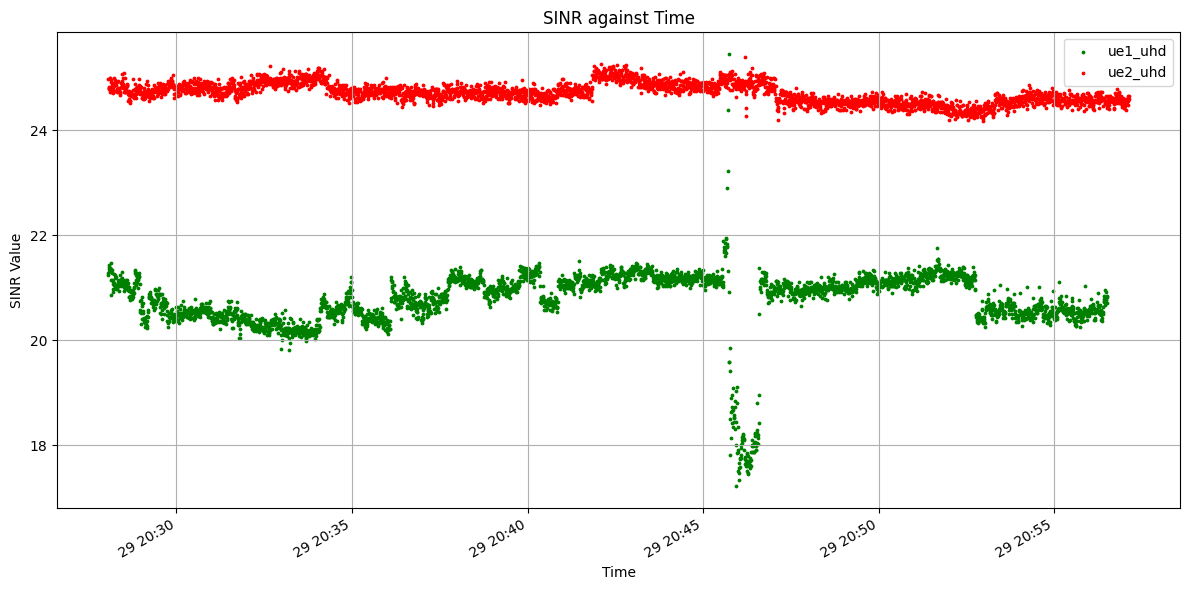

In [6]:
# Plotting the output

df = pd.read_csv('output.csv', sep='\t', parse_dates=['_time'])

plt.figure(figsize=(12, 6))

ue1_data = df[df['srsue_data_id'] == 'ue1_uhd']
plt.scatter(ue1_data['_time'],
            ue1_data['sinr'],
            color='green',
            label='ue1_uhd',
            s=3)

ue2_data = df[df['srsue_data_id'] == 'ue2_uhd']
plt.scatter(ue2_data['_time'],
            ue2_data['sinr'],
            color='red',
            label='ue2_uhd',
            s=3)

plt.title('SINR against Time')
plt.xlabel('Time')
plt.ylabel('SINR Value')
plt.grid(True)
plt.legend()
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()